# Wine Quality Data Set (Red/White) 
## Description

Data set of wines samples containing their attributes such as acidity, chlorides, density, etc. These wines were documented and then scored by professional wine testers.

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | fixed acidity | 0 - 10   |
| 2   | volatile acidity   | 0 - 1 |
| 3   | citric acid | 0 - 100 | 
| 4   |residual sugar | 0 - 0.1 |
| 5   | chlorides | 0 - 1 |
| 6   | free sulfur dioxide| 0 or 0.5 |
| 7   | total sulfur dioxide   |0 - 1 |
| 8   |  density| 0 - 1 |
| 9   |pH| 0 - 1 |
| 10  | sulphates | Location ID |
| 11  | alcohol | Location ID |
| 12  | quality | Location ID |


## Importing and processing dataset

In [1]:
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    localfile = "../../datasets/classification/"+localfile
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

In [3]:
concrete_data = download("http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls","concrete-data")
headers = ["cement","slag","ash","water","superplasticizer","coarse","fine","age","strength"]
concrete_df = pd.read_excel(concrete_data, names = headers)

## Feature selection

In [4]:
concrete_df.head()

,cement,slag,ash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
X = (concrete_df.iloc[:,:concrete_df.shape[1]-1]).to_numpy()
y = concrete_df.iloc[:,concrete_df.shape[1]-1:concrete_df.shape[1]].to_numpy().flatten()

## Scaling features

In [6]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)



## Importing libraries

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split

## Define training and plotting methods

In [8]:
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    """
    
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    
    For example:
    
       >>> train_estimators(X, y, DecisionTreeClassifier, 'max_depth', [1, 5, 10],
                            splitter='random', random_state=0)
    
       Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    # Your implementation here. Aim for 5-10 lines.
    estimators = []
    extra_params = ''

    for arg in kwargs:
        extra_params = extra_params + str(arg) + '=' + str(kwargs[arg])+ ', ' 
        
    for val in param_vals:
        estimator = estimator_type(**{param_name : val}, **kwargs).fit(X,y)
        estimators.append(estimator)
        print('Training' + ' ' +str(estimator.__class__.__name__) +'(' + str(param_name) + '=' + str(val) + ', ' + extra_params + ')...')

    return estimators;

In [9]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    # Your implementation here. Use as many lines as you need.

    N = len(param_vals)
    x2 = np.arange(N)
    
    training_scores = score_estimators(X_train, y_train, estimators)
    test_scores = score_estimators(X_test, y_test, estimators)
    val_scores = score_estimators(X_val, y_val, estimators)
    
    val_score_index = val_scores.index(np.max(val_scores))
    
    plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
    plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val') 
    plt.plot(x2, test_scores, linestyle='dashed', color = "k",label = 'test' )
    plt.plot(4,np.max(val_scores), marker = 'x', color = 'r', markersize = 16)
    
    plt.legend()
    plt.xticks(x2,param_vals)
    plt.ylim(ymin=0)
    plt.title(str(estimators[0].__class__.__name__) +' '+ 'score vs '  + str(param_name))
    plt.text(4, 0.31,'train = ' + str(training_scores[val_score_index])[:5], color='green')
    plt.text(4, 0.24, 'val = ' + str(val_scores[val_score_index])[:5], color='red')
    plt.text(4, 0.17, 'test = ' + str(test_scores[val_score_index])[:5])
    plt.figure()

In [10]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    scores = []
    for estimator in estimators:
        scores.append(estimator.score(X,y))
    return scores

# Training various classifiers
## Splitting the data into training, testing, and validation sets

In [11]:
# Your code here. Aim for 2-3 lines.
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)

## Linear Regression

In [12]:
LinearRegressionEstimators = LinearRegression().fit(X_scaled, y)
LR_train_score = LinearRegressionEstimators.score(X_train, y_train)
LR_test_score = LinearRegressionEstimators.score(X_test, y_test)
LR_val_score = LinearRegressionEstimators.score(X_val, y_val)
LR_scores = [LR_train_score,LR_test_score,LR_val_score]
print(LR_scores)

[0.5985301886192993, 0.6434420380340891, 0.6353634208212925]


NOTE : No reasonable amount of feature selection will beat using all the feature for linear regression.

## SVM Regression

Training SVR(C=0.01, gamma=0.0001, max_iter=10000, )...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000, )...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000, )...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000, )...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000, )...
Training SVR(C=1000.0, gamma=0.0001, max_iter=10000, )...


<ipython-input-9-b1055e0afb51>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
<ipython-input-9-b1055e0afb51>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val')


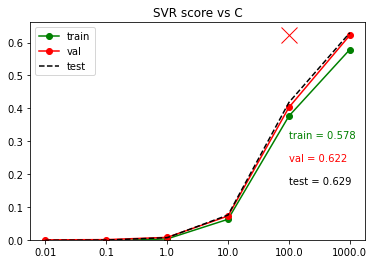

<Figure size 432x288 with 0 Axes>

In [13]:
SVMEstimator = train_estimators(X_train, y_train, sklearn.svm.SVR,
                                   'C', [0.01, 0.1,1.0,10.0,100.0,1000.0],gamma=0.0001,max_iter=10000)
plot_estimator_scores(SVMEstimator,'C',[0.01, 0.1,1.0,10.0,100.0,1000.0])

## Decision Tree Regression

Training DecisionTreeRegressor(max_depth=1, splitter=random, random_state=0, )...
Training DecisionTreeRegressor(max_depth=5, splitter=random, random_state=0, )...
Training DecisionTreeRegressor(max_depth=10, splitter=random, random_state=0, )...
Training DecisionTreeRegressor(max_depth=20, splitter=random, random_state=0, )...
Training DecisionTreeRegressor(max_depth=50, splitter=random, random_state=0, )...
Training DecisionTreeRegressor(max_depth=100, splitter=random, random_state=0, )...


<ipython-input-9-b1055e0afb51>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
<ipython-input-9-b1055e0afb51>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val')


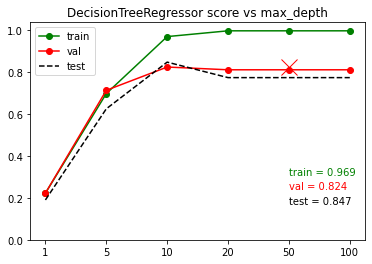

<Figure size 432x288 with 0 Axes>

In [14]:
DecisionTreeEstimators = train_estimators(X_train, y_train, DecisionTreeRegressor,
                                   'max_depth', [1, 5, 10,20,50,100], splitter='random', random_state=0)
plot_estimator_scores(DecisionTreeEstimators,'max_depth',[1, 5, 10,20,50,100])

## RandomForest Regressor

In [15]:
RandomTreeEstimators = train_estimators(X_train, y_train, sklearn.ensemble.RandomForestClassifier,
                                   'max_depth', [1, 5, 10,20,50,100], random_state=0)
plot_estimator_scores(RandomTreeEstimators,'max_depth',[1, 5, 10,20,50,100])

ValueError: Unknown label type: 'continuous'

## K-nearest Regressor

Training KNeighborsRegressor(weights=uniform, n_neighbors=2, )...
Training KNeighborsRegressor(weights=distance, n_neighbors=2, )...
Training KNeighborsRegressor(algorithm=auto, n_neighbors=2, )...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2, )...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2, )...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2, )...


<ipython-input-9-b1055e0afb51>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
<ipython-input-9-b1055e0afb51>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val')
<ipython-input-9-b1055e0afb51>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
<ipython-input-9-b1055e0afb51>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, val_scores, '-

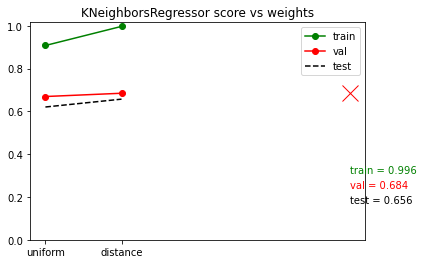

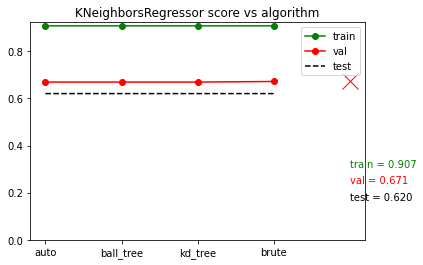

<Figure size 432x288 with 0 Axes>

In [16]:
KNearestEstimators = train_estimators(X_train, y_train, KNeighborsRegressor,
                                      'weights', ['uniform','distance'],n_neighbors=2)
plot_estimator_scores(KNearestEstimators,'weights', ['uniform','distance'])

KNearestEstimators = train_estimators(X_train, y_train, KNeighborsRegressor,
                                      'algorithm', ['auto', 'ball_tree', 'kd_tree','brute'],n_neighbors=2)
plot_estimator_scores(KNearestEstimators,'algorithm', ['auto', 'ball_tree', 'kd_tree','brute'])


## Ada Boost Regression

Training AdaBoostRegressor(n_estimators=10, random_state=0, )...
Training AdaBoostRegressor(n_estimators=50, random_state=0, )...
Training AdaBoostRegressor(n_estimators=100, random_state=0, )...
Training AdaBoostRegressor(n_estimators=500, random_state=0, )...
Training AdaBoostRegressor(n_estimators=1000, random_state=0, )...
Training AdaBoostRegressor(n_estimators=5000, random_state=0, )...


<ipython-input-9-b1055e0afb51>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
<ipython-input-9-b1055e0afb51>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val')


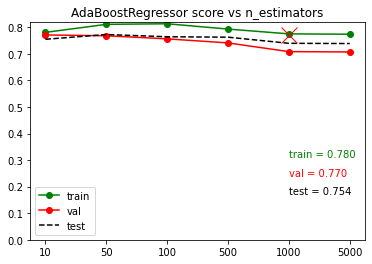

<Figure size 432x288 with 0 Axes>

In [17]:
AdaBoostEstimators = train_estimators(X_train, y_train, AdaBoostRegressor,
                                   'n_estimators', [10, 50, 100, 500, 1000, 5000], random_state=0)
plot_estimator_scores(AdaBoostEstimators,'n_estimators',[10, 50, 100, 500, 1000, 5000])

## Gaussian Process Regressor

In [18]:
clf = GaussianProcessRegressor()
NaiveBayesRegressor=clf.fit(X_train, y_train)
NB_test_scores =  NaiveBayesRegressor.score(X_test, y_test)
NB_val_scores =  NaiveBayesRegressor.score(X_val, y_val)
print(NB_val_scores,NB_test_scores)

-6.581174205668172 -8.539318876601744
